### Import all libraries and data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt
from datasist.structdata import detect_outliers
df_data = pd.read_csv(r"D:\CODING\DEPI\DATA PREPROCESSING\googleplaystore.csv")
df_data = pd.DataFrame(df_data)
df_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [2]:
df_data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Reviews , size and price can't be object

In [3]:
df_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### There is missing data in Rating 

### Remove all duplicated rows

In [4]:
df_data.duplicated().sum()

np.int64(483)

In [5]:
df_data.drop_duplicates(inplace=True)

In [6]:
df_data.describe()

,Rating
count,8893.000000
mean,4.189542
std,0.545452
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### max rating can't be 19 

# ● Fix Rating

In [7]:
df_data.drop(df_data[df_data['Rating']>5.0].index,inplace=True)

In [8]:
df_data['Rating'].max()

np.float64(5.0)

In [9]:
df_data['Rating'] = df_data['Rating'].fillna(df_data['Rating'].median())


In [10]:
Q1 = df_data['Rating'].quantile(0.25)
Q3 = df_data['Rating'].quantile(0.75)
IQR = Q3 - Q1

l = Q1 - 1.5 * IQR
u = Q3 + 1.5 * IQR

df_data = df_data[(df_data['Rating'] >= l) & (df_data['Rating'] <= u)]


In [11]:
outliers_indices = detect_outliers(df_data, 0, ['Rating'])
print(outliers_indices)


[]


# ● Fix Size

In [12]:
df_data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '2.2M',
       '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M', '7.1M',
       '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M', '4.9M',
       '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M', '2.3M',
       '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M', '6.5M', '1.5M',
       '7.5M', '51M', '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M',
       '3.3M', '40M', '7.8M', '8.8M', '6.6M', '5.1M', '4.0M', '61M',
       '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M', '18k', '6.2M',
     

In [13]:
def convert_size(size):
        size = size.lower()  
        if "m" in size:
            return float(size.replace("m", ""))
        elif "k" in size:
            return float(size.replace("k", "")) / 1024 
df_data = df_data[df_data["Size"] != "Varies with device"]
df_data["Size"] = df_data["Size"].apply(convert_size)
df_data["Size"] = df_data["Size"].astype(float)


In [14]:
def remove_outliers_iqr(df, column):
    while True:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if outliers.empty:
            break
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df
df_data = remove_outliers_iqr(df_data, 'Size')
outliers_indices = detect_outliers(df_data, 0, ['Size'])
print(outliers_indices)



[]


In [15]:
df_data['Size'].unique()

array([1.90000000e+01, 1.40000000e+01, 8.70000000e+00, 2.50000000e+01,
       2.80000000e+00, 5.60000000e+00, 2.90000000e+01, 3.30000000e+01,
       3.10000000e+00, 2.80000000e+01, 1.20000000e+01, 2.00000000e+01,
       2.10000000e+01, 3.70000000e+01, 5.50000000e+00, 1.70000000e+01,
       3.90000000e+01, 3.10000000e+01, 4.20000000e+00, 7.00000000e+00,
       2.30000000e+01, 6.00000000e+00, 6.10000000e+00, 4.60000000e+00,
       9.20000000e+00, 5.20000000e+00, 1.10000000e+01, 2.40000000e+01,
       9.40000000e+00, 1.50000000e+01, 1.00000000e+01, 1.20000000e+00,
       2.60000000e+01, 8.00000000e+00, 7.90000000e+00, 3.50000000e+01,
       1.96289062e-01, 3.60000000e+00, 5.70000000e+00, 8.60000000e+00,
       2.40000000e+00, 2.70000000e+01, 2.70000000e+00, 2.50000000e+00,
       1.60000000e+01, 3.40000000e+00, 8.90000000e+00, 3.90000000e+00,
       2.90000000e+00, 3.80000000e+01, 3.20000000e+01, 5.40000000e+00,
       1.80000000e+01, 2.20000000e+00, 4.50000000e+00, 9.80000000e+00,
      

# ● Fix Price

In [16]:
df_data['Price'].unique()

array(['0', '$4.99', '$1.49', '$2.99', '$3.99', '$7.99', '$5.99', '$1.99',
       '$6.99', '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99',
       '$11.99', '$79.99', '$16.99', '$14.99', '$1.00', '$12.99', '$3.49',
       '$10.99', '$1.50', '$19.99', '$29.99', '$74.99', '$39.99', '$2.49',
       '$4.49', '$1.70', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$1.61', '$1.59', '$1.29',
       '$5.00', '$13.99', '$299.99', '$37.99', '$18.99', '$389.99',
       '$19.90', '$8.49', '$1.75', '$14.00', '$4.85', '$46.99', '$109.99',
       '$154.99', '$3.08', '$2.59', '$4.80', '$8.99', '$1.96', '$19.40',
       '$3.04', '$4.29', '$2.60', '$3.28', '$28.99', '$2.90', '$1.97',
       '$200.00', '$89.99', '$30.99', '$3.61', '$394.99', '$1.26',
       '$6.49', '$1.20', '$1.04'], dtype=object)

In [17]:
df_data['Price'] = df_data['Price'].str.strip('$')
df_data['Price'] = df_data['Price'].astype('float')

In [18]:
outliers_indices = detect_outliers(df_data, 0, ['Price'])
print(outliers_indices)


[234, 235, 478, 479, 480, 481, 852, 853, 854, 1001, 1228, 1335, 1832, 1833, 1835, 1837, 1838, 1839, 2086, 2151, 2152, 2153, 2154, 2170, 2171, 2172, 2173, 2175, 2177, 2178, 2179, 2189, 2190, 2192, 2242, 2243, 2244, 2245, 2246, 2248, 2250, 2251, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2259, 2261, 2262, 2263, 2265, 2267, 2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275, 2277, 2278, 2279, 2281, 2283, 2285, 2286, 2288, 2289, 2292, 2293, 2294, 2296, 2297, 2298, 2302, 2390, 2414, 2422, 2423, 2425, 2883, 2906, 3039, 3403, 3405, 3408, 3441, 3658, 3957, 3959, 3964, 3966, 3968, 3985, 3997, 4034, 4047, 4057, 4108, 4134, 4139, 4140, 4156, 4158, 4166, 4169, 4172, 4173, 4175, 4177, 4178, 4190, 4192, 4197, 4203, 4260, 4265, 4293, 4299, 4301, 4316, 4362, 4367, 4380, 4391, 4395, 4397, 4400, 4409, 4411, 4413, 4416, 4417, 4419, 4423, 4427, 4429, 4431, 4433, 4437, 4450, 4451, 4452, 4453, 4456, 4457, 4458, 4459, 4460, 4461, 4462, 4465, 4466, 4468, 4471, 4487, 4488, 4489, 4491, 4508, 4521, 4534, 4542, 4554, 

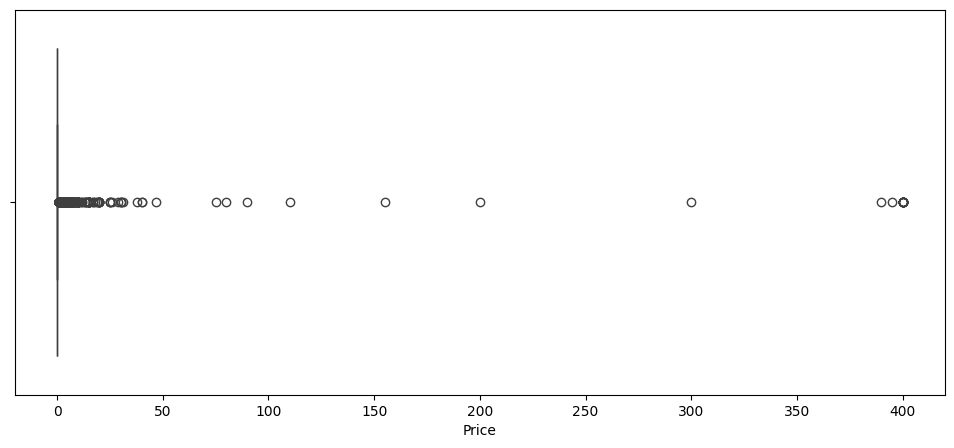

In [19]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df_data['Price'])
plt.show()

## Most of data outliers as they natural part of the dataset

## ● Fix Category

In [20]:
df_data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

## Nothing wrong with Category

# ● Fix Android Ver

In [21]:
df_data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.2 and up',
       '5.0 and up', '6.0 and up', '1.6 and up', '2.1 and up',
       '5.1 and up', '1.5 and up', '7.0 and up', '4.3 and up',
       '4.0.3 - 7.1.1', '2.0 and up', '2.3.3 and up',
       'Varies with device', '3.2 and up', '4.4W and up', '7.1 and up',
       '7.0 - 7.1.1', '8.0 and up', '5.0 - 8.0', '3.1 and up',
       '2.0.1 and up', '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up',
       '2.2 - 7.1.1', '5.0 - 7.1.1'], dtype=object)

In [22]:
df_data = df_data.loc[df_data['Android Ver'] != 'Varies with device']
df_data = df_data.dropna()

# ● Fix Reviews

In [23]:
df_data['Reviews'] = df_data['Reviews'].astype('float')

# ● Fix Installs

In [24]:
df_data['Installs'] = df_data['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Questions

### 1.What is the most expensive app on the Play Store?

In [25]:
max_price = df_data['Price'].max()
max_price = df_data[df_data['Price'] == max_price]
max_price['App']

4367    I'm Rich - Trump Edition
Name: App, dtype: object

### 2.Which genre has the highest number of apps?

In [26]:
top_genre = df_data['Genres'].value_counts().idxmax()
print(top_genre)

Tools


### 3.What is the average size of free vs. paid apps?

In [27]:
avg_size_free_vs_paid = df_data.groupby('Type')['Size'].mean()
print(avg_size_free_vs_paid)

Type
Free    15.433058
Paid    14.190778
Name: Size, dtype: float64


### 4.What are the top 5 most expensive apps with a perfect rating (5)?

In [28]:
top = df_data[(df_data['Rating'] == 5)].nlargest(5, 'Price')[['App']]
top

,App
7477,USMLE Step 2 CK Flashcards
5482,meStudying: AP English Lit
7204,TI-84 CE Graphing Calculator Manual TI 84
5237,Hey AJ! It's Saturday!
8287,AC DC Power Monitor


### 5.How many apps have received more than 50K reviews?

In [29]:
reviews = df_data[(df_data['Reviews'] >= 50000)].count()
print(reviews['Reviews'])

1167


### 6.What is the average price of apps, grouped by genre and number of installs?

In [30]:
avg = df_data.groupby(['Genres', 'Installs'])['Price'].mean()
print(avg)

Genres  Installs
Action  10          0.000
        50          0.995
        100         0.330
        500         0.000
        1000        0.000
                    ...  
Word    100000      0.000
        1000000     0.000
        5000000     0.000
        10000000    0.000
        50000000    0.000
Name: Price, Length: 808, dtype: float64


### 7.How many apps have a rating higher than 4.7, and what is their average price?

In [31]:
more_than_47 = df_data[(df_data['Rating']>4.7)].count()
avg_price = df_data[(df_data['Rating']>4.7)]['Price'].mean()
print(more_than_47.iloc[0])
print(avg_price)

510
0.3770392156862745


### 8.What is Google&#39;s estimated revenue from apps with 5,000,000+ installs?

In [32]:
more_than = df_data[(df_data['Installs']>5000000)]
revenue = (more_than['Installs'] * more_than['Price']).sum()
revenue = revenue * 0.3
print(revenue)

2970000.0


### 9.What are the maximum and minimum sizes of free vs. paid apps?

In [33]:
free_max = df_data[(df_data['Type'] == 'Free')]['Size'].max()
free_min = df_data[(df_data['Type'] == 'Free')]['Size'].min()
paid_max = df_data[(df_data['Type'] == 'Paid')]['Size'].max()
paid_min = df_data[(df_data['Type'] == 'Paid')]['Size'].min()
print('free max {} , free min {}'.format(free_max,free_min))
print('paid max {} , paid min {}'.format(paid_max,paid_min))


free max 53.0 , free min 0.00830078125
paid max 53.0 , paid min 0.0166015625


### 10.Is there a correlation between an app’s rating, number of reviews, size, and its price?

In [34]:
cor = df_data[['Rating', 'Reviews', 'Size', 'Price']].corr()
cor

,Rating,Reviews,Size,Price
Rating,1.000000,0.060164,-0.019350,-0.041592
Reviews,0.060164,1.000000,0.161564,-0.010594
Size,-0.019350,0.161564,1.000000,-0.017944
Price,-0.041592,-0.010594,-0.017944,1.000000


### 11.How many apps exist for each type (free/paid) across different content ratings?

In [35]:
app_count = df_data.groupby(['Type', 'Content Rating']).count()
app_count['App']

Type  Content Rating 
Free  Adults only 18+       2
      Everyone           5506
      Everyone 10+        182
      Mature 17+          270
      Teen                670
      Unrated               2
Paid  Everyone            501
      Everyone 10+         24
      Mature 17+           15
      Teen                 39
Name: App, dtype: int64

### 12.How many apps are compatible with Android version 4.x?

In [36]:
ver_4 = df_data[df_data['Android Ver'].str.startswith("4")].count()
print(ver_4.iloc[0])

5232
